In [1]:
import pickle as pkl
with open("../resources/final_data.pickle","rb") as pkl_in:
    en_pt_data_original = pkl.load(pkl_in)
    en_de_data_original = pkl.load(pkl_in)
    en_pt_data = pkl.load(pkl_in)
    en_de_data = pkl.load(pkl_in)
    data_original_ft = pkl.load(pkl_in)
    data_original_bert = pkl.load(pkl_in)
    data = pkl.load(pkl_in)

In [2]:
#separating unannotated from human annotated data (unscored data from scored)
unscored_data = {k : v for k, v in data.items() if data[k]['y'] == 10.0}
data = {k : v for k, v in data.items() if data[k]['y'] != 10.0}
len(unscored_data), len(data)

en_pt_data_original = {k : v for k, v in en_pt_data_original.items() if en_pt_data_original[k]['y'] != 10.0}
en_de_data_original = {k : v for k, v in en_de_data_original.items() if en_de_data_original[k]['y'] != 10.0}
en_pt_data = {k : v for k, v in en_pt_data.items() if en_pt_data[k]['y'] != 10.0}
en_de_data = {k : v for k, v in en_de_data.items() if en_de_data[k]['y'] != 10.0}
data_original_ft = {k : v for k, v in data_original_ft.items() if data_original_ft[k]['y'] != 10.0}
data_original_bert = {k : v for k, v in data_original_bert.items() if data_original_bert[k]['y'] != 10.0}

In [3]:
#data analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.hist(pd.DataFrame(data_original_ft).T[['y']].values, edgecolor = 'yellow', bins = int(180/8))     #change data of your choice to analyse
plt.xlabel('Translation Scores')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Data')

#trying power transforms to find a Gaussian distribution, or Gaussian-like distribution from the currently skewed distribution
#useful link : https://machinelearningmastery.com/how-to-transform-data-to-fit-the-normal-distribution/
from scipy.stats import boxcox
t = [i[0] for i in pd.DataFrame(data_original_ft).T[['y']].values]
d = boxcox(t, 1)
# histogram
plt.hist(d)
types = ['Original Data', 'Transformed Data']
plt.legend(types)
plt.show()

<Figure size 640x480 with 1 Axes>

In [4]:
def get_X_Y(df, split):
    
    y = df['y'].values
    del df['y']
    x = df.values
    #linear regressor doesn't take 3d input
    x = [[np.average(x[i][j]) for j in range(len(x[i]))] for i in range(len(x))]
    x = np.array(x)
    
    #train-test split
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = split, random_state=42)
    print('Size of Train Size : ', len(X_train))
    print('Size of Test Size :', len(X_test))
    
    return X_train, X_test, y_train, y_test

In [5]:
import numpy as np

def simple_LR(X_train, X_test, y_train, y_test):
    
    #model fitting
    from sklearn.linear_model import LinearRegression
    reg = LinearRegression().fit(X_train, y_train)

    yPrediction_Train = reg.predict(X_train)

    yPrediction_Test = reg.predict(X_test)
    
    #in case you are confused about score() like I was, here's a useful link : https://www.kaggle.com/getting-started/27261
    return yPrediction_Train, yPrediction_Test, reg.score(X_train, y_train), reg.score(X_test, y_test)

In [6]:
def scores(y_true, y_pred, type_):
    from sklearn.metrics import mean_squared_error
    mse = mean_squared_error(y_true, y_pred)    #mse
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))     #rmse
    coef = np.corrcoef([np.array(y_true).astype(float), np.array(y_pred).astype(float)])[1,0]  #Pearson product-moment correlation coefficients
    
    print("Results for ", type_)
    print("RMSE : ", round(rmse, 4), "MSE : ", round(mse, 4), "Pearson Correlation Coefficient : ", round(coef, 4) )
    return round(mse, 4), round(rmse, 4), round(coef, 4)

In [7]:
#model with 30 sentences as data size & fasttext embeddings: baseline 1

X_train, X_test, y_train, y_test = get_X_Y(pd.DataFrame(en_pt_data_original).T[['lang1_fe_ft', 'lang1_fn_ft', 'lang2_fe_ft', 'lang2_fn_ft','y']], 0.33)
ypred_train_enpt_original, ypred_test_enpt_original, score_train_enpt_original, score_test_enpt_original = simple_LR(X_train, X_test, y_train, y_test)

print("----------------------------------------------------")
#model 1 scores
print("En-Pt scores")
print(score_train_enpt_original, score_test_enpt_original)
mse_train_enpt_original, rmse_train_enpt_original, corel_enpt_original_train = scores(y_train, ypred_train_enpt_original, "train")
mse_test_enpt_original, rmse_test_enpt_original, corel_enpt_original_test = scores(y_test, ypred_test_enpt_original, "test")

print("------------------------------------------------")

X_train, X_test, y_train, y_test = get_X_Y(pd.DataFrame(en_de_data_original).T[['lang1_fe_ft', 'lang1_fn_ft', 'lang2_fe_ft', 'lang2_fn_ft','y']], 0.33)
ypred_train_ende_original, ypred_test_ende_original, score_train_ende_original, score_test_ende_original = simple_LR(X_train, X_test, y_train, y_test)

print("----------------------------------------------------")

print("En-De scores")
print(score_train_ende_original, score_test_ende_original)
mse_train_ende_original, rmse_train_ende_original, corel_ende_original_train = scores(y_train, ypred_train_ende_original, "train")
mse_test_ende_original, rmse_test_ende_original, corel_ende_original_test = scores(y_test, ypred_test_ende_original, "test")



Size of Train Size :  20
Size of Test Size : 10
----------------------------------------------------
En-Pt scores
0.2607708089205858 -0.6115674720190696
Results for  train
RMSE :  0.1179 MSE :  0.0139 Pearson Correlation Coefficient :  0.5107
Results for  test
RMSE :  0.0982 MSE :  0.0096 Pearson Correlation Coefficient :  -0.0537
------------------------------------------------
Size of Train Size :  20
Size of Test Size : 11
----------------------------------------------------
En-De scores
0.10332481354910317 -0.9970102719282232
Results for  train
RMSE :  0.155 MSE :  0.024 Pearson Correlation Coefficient :  0.3214
Results for  test
RMSE :  0.1722 MSE :  0.0296 Pearson Correlation Coefficient :  -0.1663


In [8]:
#model with 40 sentences (30 original and 10 negative samples) as data size & fasttext embeddings: baseline 2

X_train, X_test, y_train, y_test = get_X_Y(pd.DataFrame(en_pt_data).T[['lang1_fe_ft', 'lang1_fn_ft', 'lang2_fe_ft', 'lang2_fn_ft','y']], 0.165)
ypred_train_enpt, ypred_test_enpt, score_train_enpt, score_test_enpt = simple_LR(X_train, X_test, y_train, y_test)

print("----------------------------------------------------")
print("En-Pt scores")
print(score_train_enpt, score_test_enpt)
mse_train_enpt, rmse_train_enpt, corel_train_enpt = scores(y_train, ypred_train_enpt, "train")
mse_test_enpt, rmse_test_enpt, corel_test_enpt = scores(y_test, ypred_test_enpt, "test")

print("----------------------------------------------------")
X_train, X_test, y_train, y_test = get_X_Y(pd.DataFrame(en_de_data).T[['lang1_fe_ft', 'lang1_fn_ft', 'lang2_fe_ft', 'lang2_fn_ft','y']], 0.33)
ypred_train_ende, ypred_test_ende, score_train_ende, score_test_ende = simple_LR(X_train, X_test, y_train, y_test)

print("----------------------------------------------------")

#model 2 scores
print("En-De scores")
print(score_train_ende, score_test_ende)
mse_train_ende, rmse_train_ende, corel_train_ende = scores(y_train, ypred_train_ende, "train")
mse_test_ende, rmse_test_ende, corel_test_ende = scores(y_test, ypred_test_ende, "test")


Size of Train Size :  33
Size of Test Size : 7
----------------------------------------------------
En-Pt scores
0.14308896333765042 -0.4009121658719783
Results for  train
RMSE :  0.3424 MSE :  0.1173 Pearson Correlation Coefficient :  0.3783
Results for  test
RMSE :  0.372 MSE :  0.1383 Pearson Correlation Coefficient :  -0.5679
----------------------------------------------------
Size of Train Size :  27
Size of Test Size : 14
----------------------------------------------------
En-De scores
0.24988421209782288 -0.17354589262060505
Results for  train
RMSE :  0.3254 MSE :  0.1059 Pearson Correlation Coefficient :  0.4999
Results for  test
RMSE :  0.3365 MSE :  0.1132 Pearson Correlation Coefficient :  0.091


In [9]:
#model with 61 sentences as data size & fasttext embeddings - using simple linear regressor: baseline 3

X_train, X_test, y_train, y_test = get_X_Y(pd.DataFrame(data_original_ft).T, 0.33)
ypred_train, ypred_test, score_train, score_test = simple_LR(X_train, X_test, y_train, y_test)

print("--------------------------------------------")
#model 3 scores
print(score_train, score_test)
mse_train_ft, rmse_train_ft, corel_train_ft = scores(y_train, ypred_train, "train")
mse_test_ft, rmse_test_ft, corel_test_ft = scores(y_test, ypred_test, "test")

Size of Train Size :  40
Size of Test Size : 21
--------------------------------------------
0.3078918582019393 0.011829509113257641
Results for  train
RMSE :  0.1003 MSE :  0.0101 Pearson Correlation Coefficient :  0.5549
Results for  test
RMSE :  0.1656 MSE :  0.0274 Pearson Correlation Coefficient :  0.2512


In [10]:
#model with 61 sentences as data size & bert embeddings - using simple linear regressor: baseline 4

X_train, X_test, y_train, y_test = get_X_Y(pd.DataFrame(data_original_bert).T, 0.33)
ypred_train, ypred_test, score_train, score_test = simple_LR(X_train, X_test, y_train, y_test)

print("--------------------------------------------")
#model 3 scores
print(score_train, score_test)
mse_train_bert, rmse_train_bert, corel_train_bert = scores(y_train, ypred_train, "train")
mse_test_bert, rmse_test_bert, corel_test_bert = scores(y_test, ypred_test, "test")

Size of Train Size :  40
Size of Test Size : 21
--------------------------------------------
0.36223064587102194 0.15849299211959245
Results for  train
RMSE :  0.0963 MSE :  0.0093 Pearson Correlation Coefficient :  0.6019
Results for  test
RMSE :  0.1528 MSE :  0.0233 Pearson Correlation Coefficient :  0.4513


In [11]:
#pd.DataFrame(data).T[['lang1_fe_ft', 'lang1_fn_ft', 'lang1_lu_ft', 'lang1_sent_ft', 'lang2_fe_ft', 'lang2_fn_ft', 'lang2_lu_ft', 'lang2_sent_ft','y']]

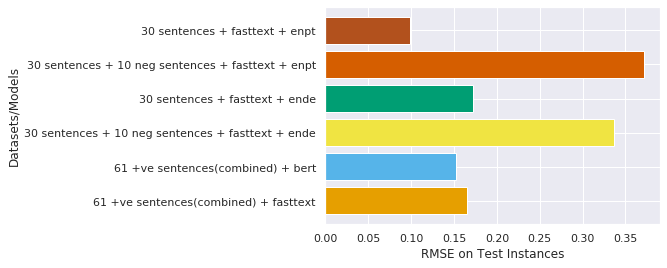

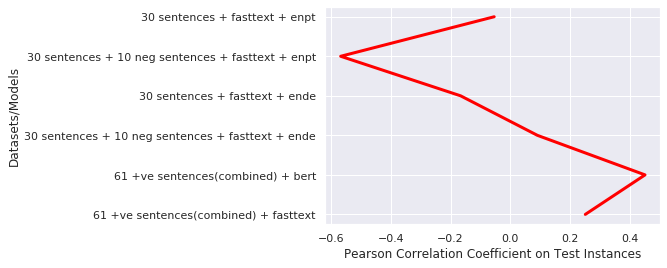

In [12]:
#plotting output

#plotting rmse values
y = [rmse_test_ft, rmse_test_bert, rmse_test_ende, rmse_test_ende_original, rmse_test_enpt, rmse_test_enpt_original]
x = ["61 +ve sentences(combined) + fasttext", "61 +ve sentences(combined) + bert", "30 sentences + 10 neg sentences + fasttext + ende","30 sentences + fasttext + ende", "30 sentences + 10 neg sentences + fasttext + enpt", "30 sentences + fasttext + enpt"]
colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73', '#D55E00', '#B2511D', '#0207DF']
plt.barh(x, y, align = 'center', color = colors) # A bar chart
plt.xlabel('RMSE on Test Instances')
plt.ylabel('Datasets/Models')

plt.show()

y = [corel_test_ft, corel_test_bert, corel_test_ende, corel_ende_original_test, corel_test_enpt, corel_enpt_original_test]
x = ["61 +ve sentences(combined) + fasttext", "61 +ve sentences(combined) + bert", "30 sentences + 10 neg sentences + fasttext + ende","30 sentences + fasttext + ende", "30 sentences + 10 neg sentences + fasttext + enpt", "30 sentences + fasttext + enpt"]
#colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73', '#D55E00', '#B2511D', '#0207DF']
plt.plot(y, x, color = 'red', lw = 3) # A bar chart
plt.xlabel('Pearson Correlation Coefficient on Test Instances')
plt.ylabel('Datasets/Models')

plt.show()